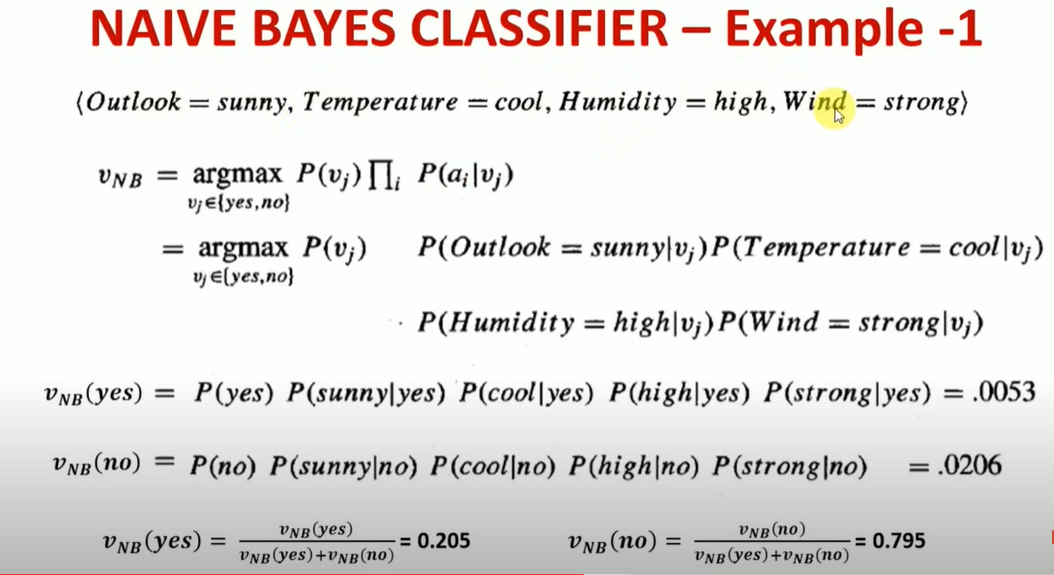

In [3]:
from IPython.display import Image, display

# Use a raw string or forward slashes
file_path = r"C:\Users\keert\machine learning\navis_bayes_2.PNG"

# Display the image
display(Image(filename=file_path))

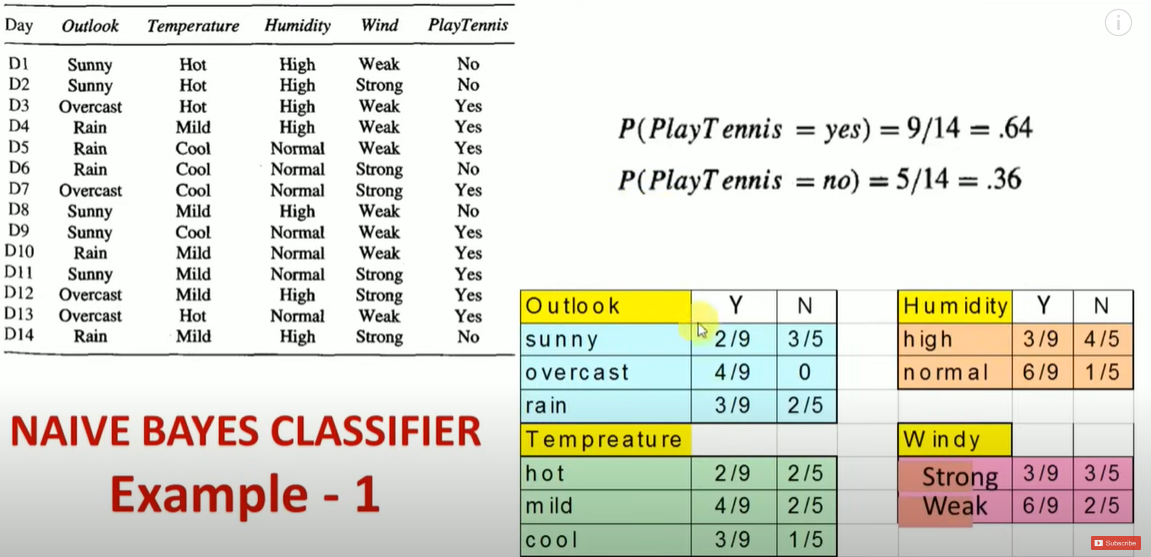

In [5]:
from IPython.display import Image, display

# Use a raw string or forward slashes
file_path = r"C:\Users\keert\machine learning\navis_bayes_1.PNG"

# Display the image
display(Image(filename=file_path))

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create DataFrame
data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play cricket': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)


df



,Day,Outlook,Temperature,Humidity,Wind,Play cricket
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [8]:
# Encode categorical features and target variable
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [9]:

# Features and target variable
X = df.drop(['Play cricket','Day'], axis=1)
y = df['Play cricket']


In [10]:
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [11]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play cricket, dtype: int32

In [12]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train

,Outlook,Temperature,Humidity,Wind
5,1,0,1,0
8,2,0,1,1
2,0,1,0,1
1,2,1,0,0
13,1,2,0,0
4,1,0,1,1
7,2,2,0,1
10,2,2,1,0
3,1,2,0,1
6,0,0,1,0


In [21]:
X_test

,Outlook,Temperature,Humidity,Wind
9,1,2,1,1
11,0,2,0,0
0,2,1,0,1
12,0,1,1,1


In [23]:
y_train

5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: Play cricket, dtype: int32

In [25]:
y_test

9     1
11    1
0     0
12    1
Name: Play cricket, dtype: int32

In [27]:
# Initialize and train the Categorical Naive Bayes classifier
model = CategoricalNB()
model.fit(X_train, y_train)


CategoricalNB()

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)


Predictions: [1 0 0 1]


In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.75
Confusion Matrix:
 [[1 0]
 [1 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [33]:
from tkinter import *
import pickle
import numpy as np
pickle.dump(model,open('navis_bayes.pkl','wb'))